In [ ]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance

from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif

from keras.utils import to_categorical
import tensorflow as tf
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# changing the working directory
import os
os.chdir('/content/drive/MyDrive/5322/')

In [ ]:
#Metadata about the dataset
names_data = pd.read_csv('connect-4.names', header=None, skiprows=0, delimiter=':')

x is player 1<br>
o is player 2<br>
b is blank<br>
The outcome class is the game theoretical value for the first player.<br>
This database contains all legal 8-ply positions in the game of connect-4 in which neither player has won yet, and in which the next move is not forced.

In [ ]:
# reading the data
data = pd.read_csv('connect-4.data', header=None)
# adding the columns
data.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', 'outcome']
data.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,outcome
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win


In [ ]:
data.shape

(67557, 43)

In [ ]:
data.isnull().sum().sum()

0

There are no null values in the data.

# Visualizations

In [ ]:
data['outcome'].value_counts()

win     44473
loss    16635
draw     6449
Name: outcome, dtype: int64

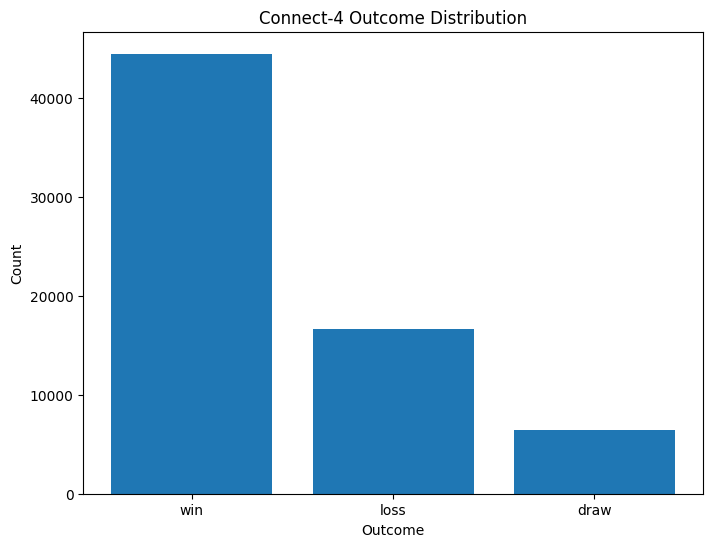

In [ ]:
# Barplot to understand the output distribution.
outcome_counts = data['outcome'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(outcome_counts.index, outcome_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Connect-4 Outcome Distribution')
plt.show()

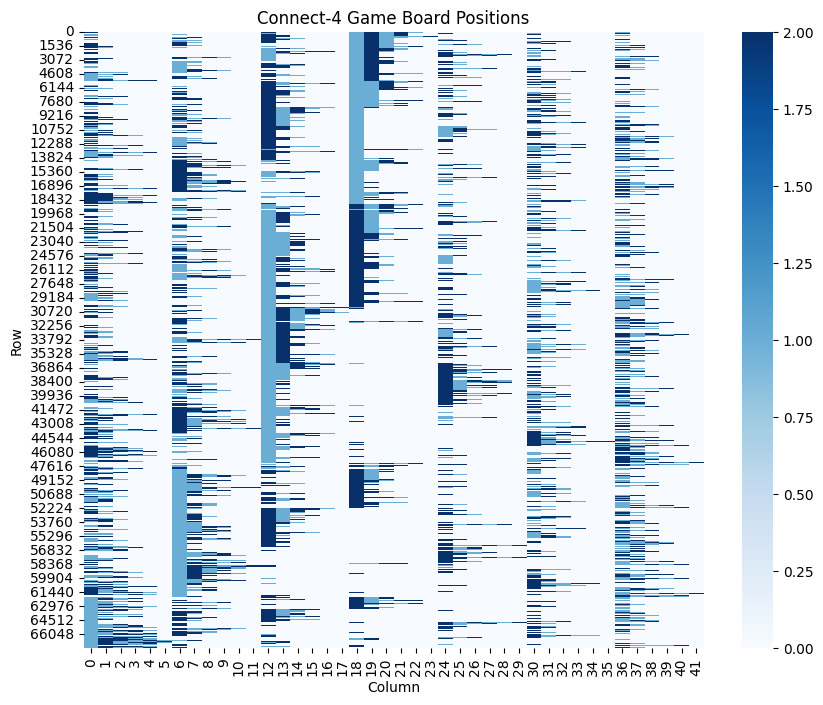

In [ ]:
# heatmap to visualize the board positions
board_positions = data.iloc[:, :-1]  # Exclude the outcome column

# Map categorical values to numerical values
board_positions_encoded = board_positions.replace({'b': 0, 'x': 1, 'o': 2})

plt.figure(figsize=(10, 8))
sns.heatmap(board_positions_encoded, cmap='Blues')
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('Connect-4 Game Board Positions')
plt.show()


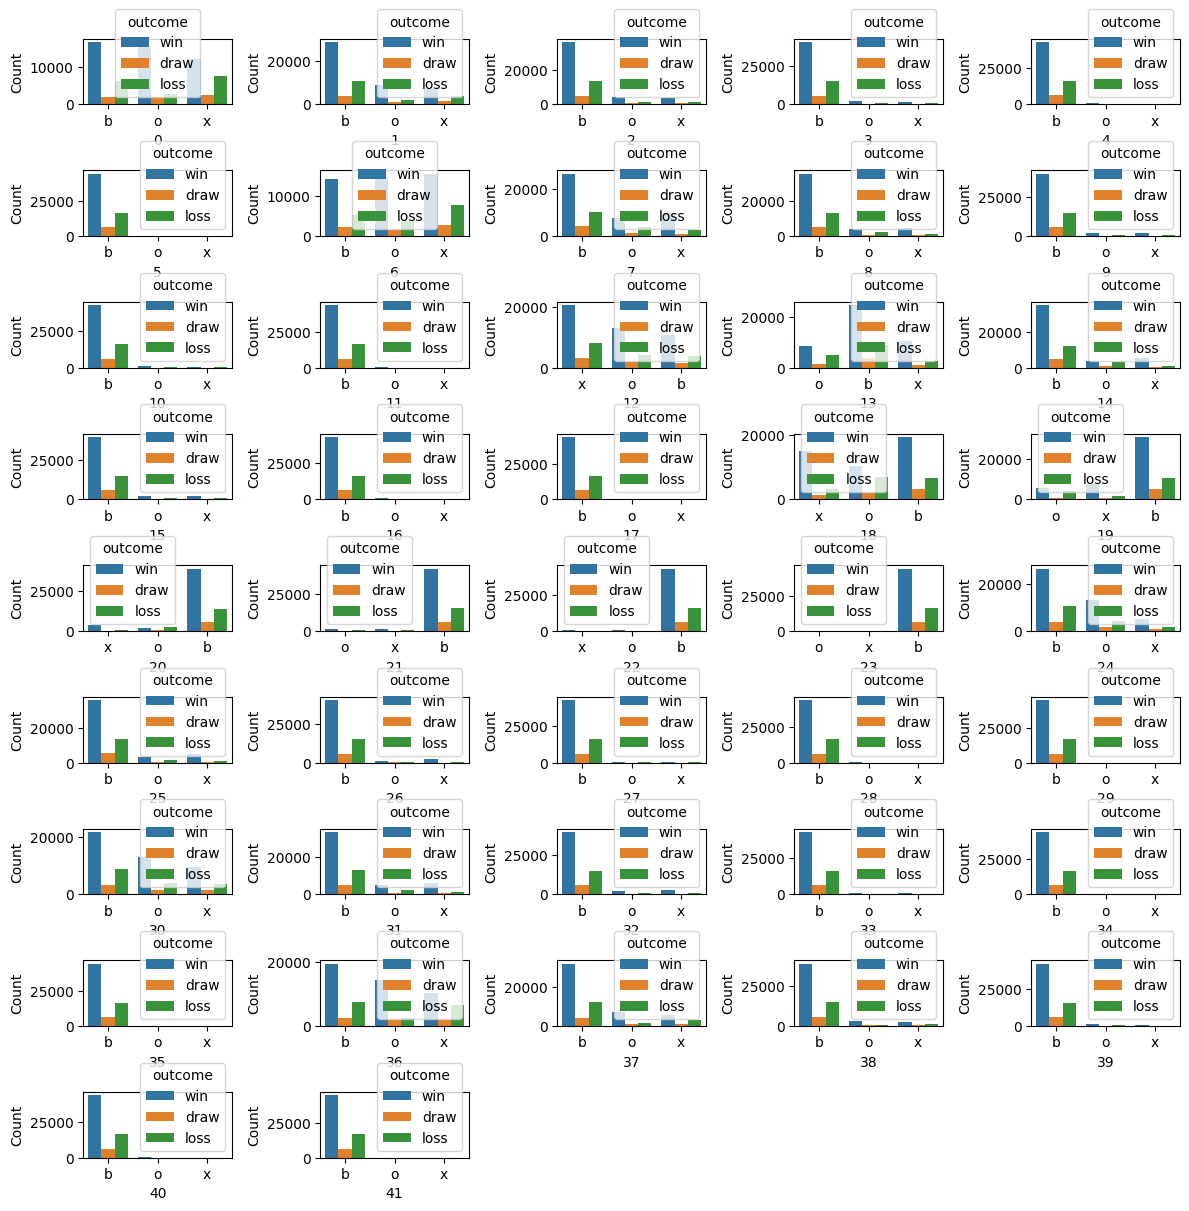

In [ ]:
# pairplot to visualize the relationship between each individual feature (game board position) and the outcome,
features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41']

# Your code for creating the pairplots here...
plt.figure(figsize=(12, 12))
for i, feature in enumerate(features):
    plt.subplot(9, 5, i+1)
    sns.countplot(x=feature, hue='outcome', data=data)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


# Preprocessing Data

In [ ]:
# Split the data into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
# Apply one-hot encoding to categorical features
X_encoded = X.replace({'b': 0, 'x': 1, 'o': 2})
X_encoded

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67552,1,1,0,0,0,0,2,1,2,0,...,0,0,0,0,2,2,1,0,0,0
67553,1,1,0,0,0,0,2,0,0,0,...,0,0,0,0,2,1,2,2,1,0
67554,1,1,0,0,0,0,2,2,0,0,...,0,0,0,0,2,1,1,2,0,0
67555,1,2,0,0,0,0,2,0,0,0,...,0,0,0,0,2,1,2,1,1,0


In [ ]:
# Map class labels to numerical values
class_mapping = {'win': 1, 'draw': 0, 'loss': -1}
y = y.map(class_mapping)
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(54045, 42) (13512, 42)


# Logistic Regression

In [ ]:
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)

print("Logistic Regression Accuracy: {:.2f}%".format(logistic_regression_accuracy*100))

Logistic Regression Accuracy: 65.75%


# Decision Trees

In [ ]:
# Fitting a decision tree.
tree1 = DecisionTreeClassifier(random_state=1)
tree1.fit(X_train, y_train)

# Calculate the accuracy of the decision tree on the test data
accuracy = tree1.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 75.87%


In [ ]:
importances = pd.DataFrame({'feature_name': X_train.columns, 'importance': tree1.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
importances.head(5)

,feature_name,importance
0,6,0.066177
1,7,0.056426
2,30,0.056181
3,0,0.055566
4,13,0.055475


## Random Forest

In [ ]:
# Decision Trees with Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Random Forest Accuracy: {:.2f}%".format(random_forest_accuracy*100))

Random Forest Accuracy: 81.94%


In [ ]:
# create a dataframe of feature importances and their corresponding column names
importances_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': random_forest.feature_importances_})
importances_rf = importances_rf.sort_values('Importance', ascending=False).reset_index(drop=True)
importances_rf.head(5)

,Feature,Importance
0,6,0.060264
1,12,0.056114
2,36,0.055727
3,0,0.055322
4,18,0.054773


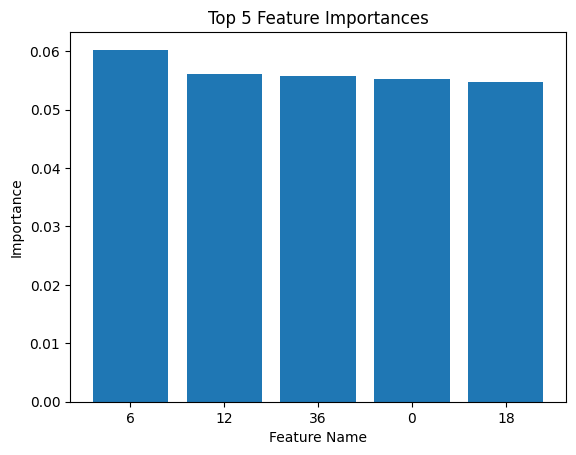

In [ ]:
# create a bar plot of feature importances
plt.bar(importances_rf.Feature[:5], importances_rf.Importance[:5])
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances')
plt.show()

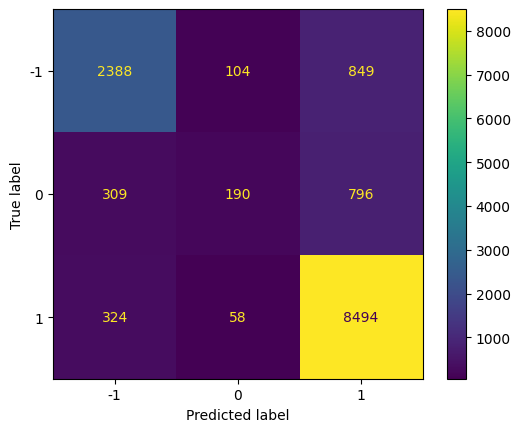

In [ ]:
# plot the confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, random_forest_predictions)
disp

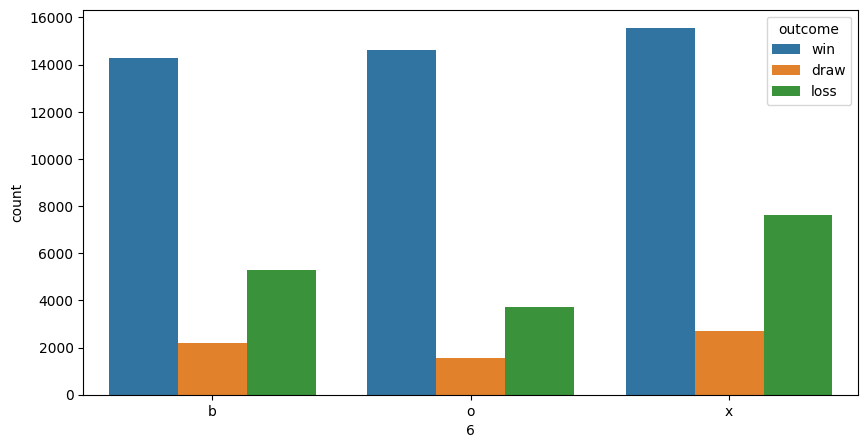

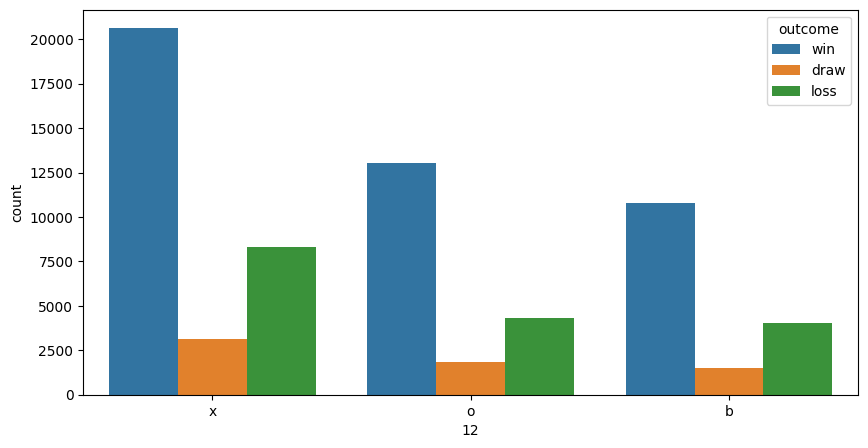

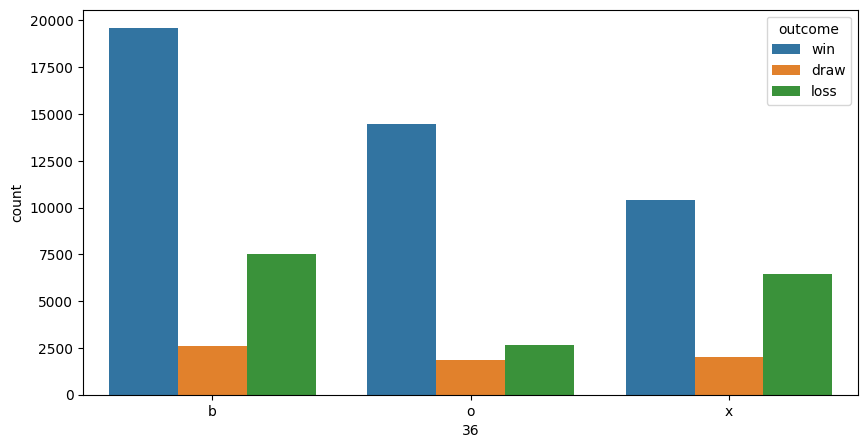

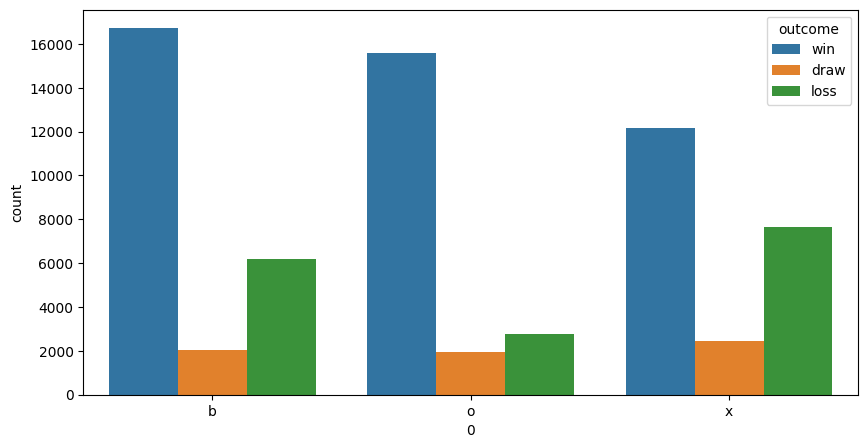

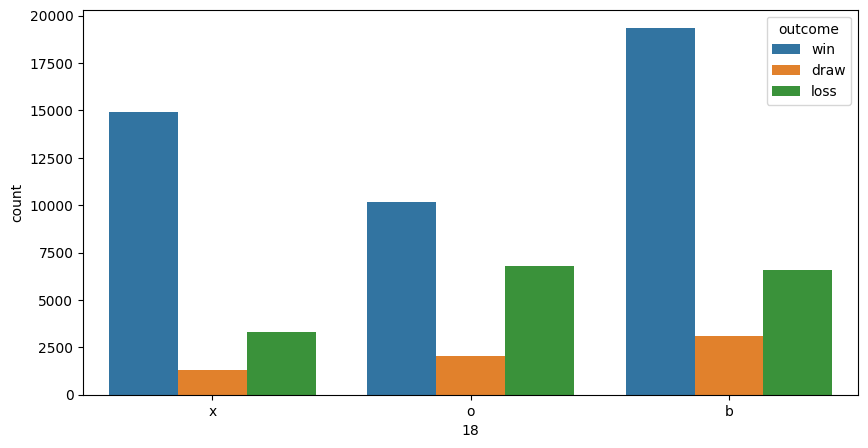

In [ ]:
import seaborn as sns

# Get the top 5 important variables
top_5_vars = importances_rf.iloc[:5]['Feature'].tolist()

# Plot countplots for each of the top 5 variables
for var in top_5_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=var, hue='outcome', data=data)
    plt.show()

## Boosting

In [ ]:
# Create a gradient boosting classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=1)

# Fit the model on the training data
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=1)

In [ ]:
# Predict the target variable on the test data
y_pred = gb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 78.06%


In [ ]:
# create a dataframe of feature importances and their corresponding column names
importances_boost = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb.feature_importances_})
importances_boost = importances_boost.sort_values('Importance', ascending=False).reset_index(drop=True)

importances_boost.head()

,Feature,Importance
0,18,0.094775
1,13,0.087695
2,20,0.087271
3,19,0.084545
4,0,0.083536


# SVM

## Linear SVM

In [ ]:
# Perform feature selection
k = 15  # number of top features to select
selector = SelectKBest(f_classif, k=k)
selector.fit(X_train, y_train)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)

In [ ]:
linear_svm = SVC(kernel='linear', cache_size=1000, verbose = True, max_iter = 1000, random_state=42)

# Fit the model to the training data
linear_svm.fit(X_train_new, y_train)

svm_predictions = linear_svm.predict(X_test_new)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Linear SVM Accuracy: %.2f%%" % (svm_accuracy * 100))

[LibSVM]Linear SVM Accuracy: 49.59%


## Radial SVM

In [ ]:
radial_svm = SVC(kernel='rbf', cache_size=1000, verbose = True, max_iter = 10000, random_state=42)
# Fit the model to the training data
radial_svm.fit(X_train_new, y_train)

radial_svm_predictions = radial_svm.predict(X_test_new)
radial_svm_accuracy = accuracy_score(y_test, radial_svm_predictions)
print("Radial SVM Accuracy: %.2f%%" % (radial_svm_accuracy * 100))

[LibSVM]Radial SVM Accuracy: 74.52%


# Neural Networks

In [ ]:
# Set the seed for reproducibility
np.random.seed(123)
tf.random.set_seed(123)

# Convert target variable to categorical format
num_classes = len(class_mapping)
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_categorical, epochs=15, batch_size=32, validation_data=(X_test, y_test_categorical))

Epoch 1/15
1689/1689 [==============================] - 7s 4ms/step - loss: 0.7632 - accuracy: 0.6809 - val_loss: 0.7015 - val_accuracy: 0.7094
Epoch 2/15
1689/1689 [==============================] - 4s 2ms/step - loss: 0.6435 - accuracy: 0.7383 - val_loss: 0.6255 - val_accuracy: 0.7479
Epoch 3/15
1689/1689 [==============================] - 4s 2ms/step - loss: 0.5813 - accuracy: 0.7652 - val_loss: 0.5766 - val_accuracy: 0.7668
Epoch 4/15
1689/1689 [==============================] - 6s 4ms/step - loss: 0.5499 - accuracy: 0.7790 - val_loss: 0.5678 - val_accuracy: 0.7714
Epoch 5/15
1689/1689 [==============================] - 4s 3ms/step - loss: 0.5319 - accuracy: 0.7870 - val_loss: 0.5651 - val_accuracy: 0.7726
Epoch 6/15
1689/1689 [==============================] - 4s 3ms/step - loss: 0.5185 - accuracy: 0.7929 - val_loss: 0.5396 - val_accuracy: 0.7833
Epoch 7/15
1689/1689 [==============================] - 6s 3ms/step - loss: 0.5070 - accuracy: 0.7999 - val_loss: 0.5287 - val_accuracy:

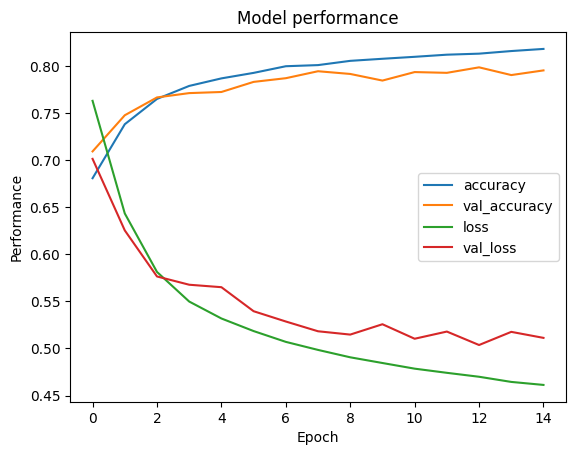

In [ ]:
# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

423/423 [==============================] - 1s 2ms/step - loss: 0.5113 - accuracy: 0.7955
Test Loss: 0.5113
Test Accuracy: 0.7955


# SVD

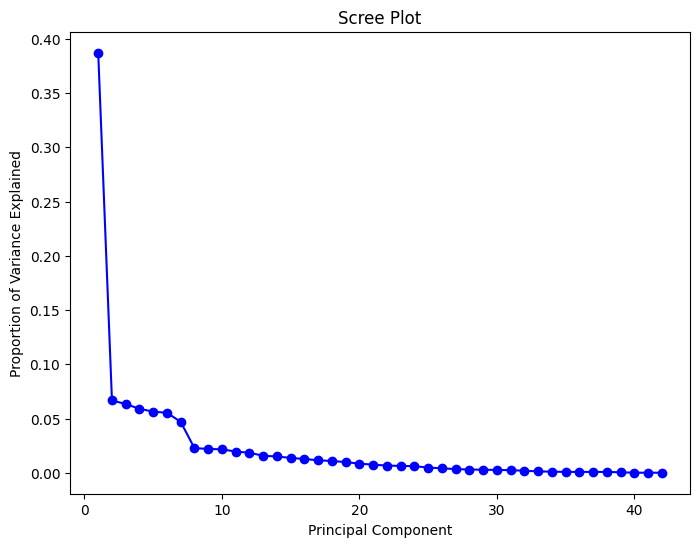

In [ ]:
# Perform SVD on the encoded data
U, s, Vt = np.linalg.svd(X_encoded, full_matrices=False)

# Calculate the proportion of variance explained
explained_variance = np.square(s) / np.sum(np.square(s))
cumulative_variance = np.cumsum(explained_variance)

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

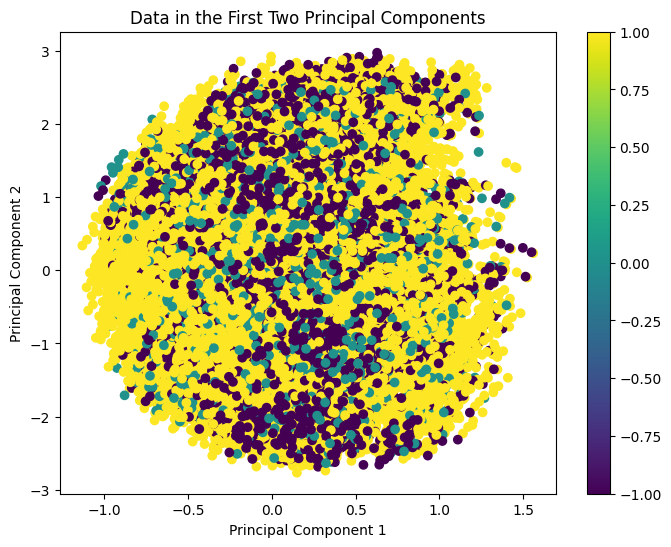

In [ ]:
# Project the data onto the first two principal components
X_pca = np.dot(X_encoded - np.mean(X_encoded, axis=0), Vt.T[:, :2])

# Plot the data in the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in the First Two Principal Components')
plt.colorbar()
plt.show()

# Clustering

In [ ]:
# Perform clustering using K-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_encoded)

# Assign cluster labels to the original data
data['cluster'] = kmeans.labels_

# Display observations within the same cluster
for cluster_label in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster_label]
    print(f"Observations in Cluster {cluster_label}:")
    print(cluster_data.head())
    print()

Observations in Cluster 1:
   0  1  2  3  4  5  6  7  8  9  ... 34 35 36 37 38 39 40 41 outcome cluster
0  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b     win       1
1  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b     win       1
2  b  b  b  b  b  b  o  b  b  b  ...  b  b  b  b  b  b  b  b     win       1
3  b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b     win       1
4  o  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b     win       1

[5 rows x 44 columns]

Observations in Cluster 0:
    0  1  2  3  4  5  6  7  8  9  ... 34 35 36 37 38 39 40 41 outcome cluster
8   b  b  b  b  b  b  x  o  b  b  ...  b  b  b  b  b  b  b  b     win       0
39  b  b  b  b  b  b  x  o  b  b  ...  b  b  b  b  b  b  b  b    loss       0
59  b  b  b  b  b  b  o  o  b  b  ...  b  b  b  b  b  b  b  b    loss       0
64  b  b  b  b  b  b  o  o  b  b  ...  b  b  b  b  b  b  b  b    loss       0
69  b  b  b  b  b  b  o  o  b  b  ...  b  b  b  b  b  b  b  b     win 

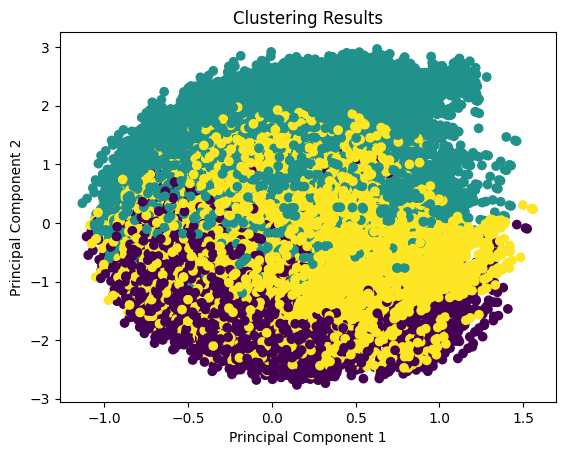

In [ ]:
from sklearn.metrics import completeness_score
# Perform clustering using K-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_encoded)

# Assign cluster labels to the original data
data['cluster'] = kmeans.labels_

# Plot the data points colored by the cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.show()

In [ ]:
# Calculate the completeness score
completeness = completeness_score(y, data['cluster'])
print(f"Completeness Score: {completeness}")

Completeness Score: 0.002307015334908293


In [ ]:
# Evaluate the model performance using silhouette score
silhouette = silhouette_score(X_encoded, kmeans.labels_)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.08820663846626903
